First I will start exploring the data here and try to find out any insights from the data avaialable.

In [134]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn import metrics as mat
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import math
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
borrower = pd.read_csv('./Data/borrower_table.csv')
loan = pd.read_csv('./Data/loan_table.csv')

In [4]:
#========================  Data Exploration  ==========================#
borrower.describe()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
count,101100.000000,101100.000000,46153.000000,46153.000000,101100.000000,94128.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000
mean,499666.826726,0.543492,0.899291,0.364332,4112.743818,0.724140,1799.617616,3177.150821,0.658675,21020.727992,41.491632,3.864748
std,288662.006929,0.498107,0.300946,0.481247,2129.121462,0.186483,1400.545141,2044.448155,0.474157,18937.581415,12.825570,2.635491
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,250333.750000,0.000000,1.000000,0.000000,2700.000000,0.600000,834.000000,1706.000000,0.000000,0.000000,32.000000,2.000000
50%,499885.000000,1.000000,1.000000,0.000000,4100.000000,0.730000,1339.000000,2673.000000,1.000000,21500.000000,41.000000,3.000000
75%,749706.250000,1.000000,1.000000,1.000000,5500.000000,0.860000,2409.000000,4241.000000,1.000000,35300.000000,50.000000,6.000000
max,999987.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13906.000000,1.000000,97200.000000,79.000000,8.000000


In [6]:
loan.describe()

,loan_id,loan_granted,loan_repaid
count,101100.000000,101100.000000,47654.000000
mean,499666.826726,0.471355,0.644353
std,288662.006929,0.499181,0.478714
min,30.000000,0.000000,0.000000
25%,250333.750000,0.000000,0.000000
50%,499885.000000,0.000000,1.000000
75%,749706.250000,1.000000,1.000000
max,999987.000000,1.000000,1.000000


From above descriptions of the data sets, following insights can be inferred:
* The data set consists of 101100 loans
* More than 50% of people applied first time for loan
* More than 25% of people granted loan

In [13]:
loan = loan.merge(borrower,on='loan_id',how='left')

In [15]:
loan.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,2012-03-15,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,2012-01-17,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2012-02-09,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4


In [80]:
print('The given data ranges from',min(loan['date']),'to',max(loan['date']))

The given data ranges from 2012-01-02 to 2012-12-28


Lets dig into the details of loans which are **granted**. I am going to check how many % of loans are repaid for different kind of groups:
1. First loan, no loan taken before
2. Have taken loan before this and paid that loan
3. Have taken loan before this and currently paying that loan
4. Have taken loan before this and not paying that loan

#### 1. First loan(no loan taken before)

In [25]:
granted_loans = sum(loan['loan_granted'])
total_loans = len(loan)
first_loan_granted = sum(loan.loc[loan['loan_granted']==1,'is_first_loan'])
print('Total applications:',total_loans,'  Total loans granted:',granted_loans,
      '(',int(granted_loans*100/total_loans),'%)')
print('Out of granted loans, First loan application:',first_loan_granted,'(',int(first_loan_granted*100/granted_loans),'%)')
print('% of loans repaid:',
      int(sum(loan.loc[(loan['loan_granted']==1)&(loan['is_first_loan']==1),'loan_repaid'])*100/first_loan_granted),'%')

Total applications: 101100   Total loans granted: 47654 ( 47 %)
Out of granted loans, First loan application: 25789 ( 54 %)
% of loans repaid: 65 %


#### 2. Have taken loan before this and paid that laon

In [31]:
granted_loans = sum(loan['loan_granted'])
total_loans = len(loan)
taken_prev_loans = granted_loans-sum(loan.loc[loan['loan_granted']==1,'is_first_loan'])
taken_prev_loan_paid = sum(loan.loc[(loan['loan_granted']==1)&(loan['is_first_loan']==0),'fully_repaid_previous_loans'])
print('Out of granted loans, applicants who have taken loan in past:',
      taken_prev_loans,'(',int(taken_prev_loans*100/granted_loans),'%)')
print('Previous loans paid:',taken_prev_loan_paid,'(',int(taken_prev_loan_paid*100/taken_prev_loans),'%)')
print('% of current loans repaid:',int(sum(loan.loc[(loan['loan_granted']==1)&
                                                    (loan['fully_repaid_previous_loans']==1)&
                                                    (loan['is_first_loan']==0),'loan_repaid'])*100/taken_prev_loan_paid),'%')

Out of granted loans, applicants who have taken loan in past: 21865 ( 45 %)
Previous loans paid: 19733.0 ( 90 %)
% of current loans repaid: 64 %


#### 3. Have taken loan before this and currently paying that loan

In [32]:
taken_prev_loan_paying=sum(loan.loc[(loan['loan_granted']==1)&(loan['fully_repaid_previous_loans']==0)&
                                    (loan['is_first_loan']==0),'currently_repaying_other_loans'])
print('Previous loans currently paying:',taken_prev_loan_paying,'(',int(taken_prev_loan_paying*100/taken_prev_loans),'%)')
print('% of current loans repaid:',int(sum(loan.loc[(loan['loan_granted']==1)&
                                                    (loan['fully_repaid_previous_loans']==0)&
                                                    (loan['is_first_loan']==0)&
                                                    (loan['currently_repaying_other_loans']==1),'loan_repaid'])*100/taken_prev_loan_paying),'%')

Previous loans currently paying: 682.0 ( 3 %)
% of current loans repaid: 21 %


#### 4. Have taken loan before this and not paying that loan

In [33]:
taken_prev_loan_not_paying=len(loan.loc[(loan['loan_granted']==1)&(loan['fully_repaid_previous_loans']==0)&
                                        (loan['is_first_loan']==0),:])-sum(loan.loc[(loan['loan_granted']==1)&
                                                                                    (loan['fully_repaid_previous_loans']==0)&
                                                                                    (loan['is_first_loan']==0),'currently_repaying_other_loans'])
print('Previous loans currently not paying:',taken_prev_loan_not_paying,'(',int(taken_prev_loan_not_paying*100/taken_prev_loans),'%)')
print('% of current loans repaid:',int(sum(loan.loc[(loan['loan_granted']==1)&
                                                    (loan['fully_repaid_previous_loans']==0)&
                                                    (loan['is_first_loan']==0)&
                                                    (loan['currently_repaying_other_loans']==0),'loan_repaid'])*100/taken_prev_loan_not_paying),'%')

Previous loans currently not paying: 1450.0 ( 6 %)
% of current loans repaid: 75 %


The above analysis clearly shows **% of repaid loans** for different groups of loans:
1. First loan(no loan taken before) - 65%
2. Have taken loan before this and paid that loan - 64%
3. Have taken loan before this and currently paying that loan - 21%
4. Have taken loan before this and not paying that loan - 75%

So, clearly people who have taken loan previously and not paid and currently not paying them are paying current loan with more consistency(75%). And the same time people who are paying their previous loans are very less likely(21%) to pay current loan amount.

Now I will look at effect of different parameters on target variable(whether current loan repaid or not?)

In [38]:
newdata = loan.loc[loan['loan_granted']==0,:]
train = loan.loc[loan['loan_granted']==1,:]

<IPython.core.display.Javascript object>


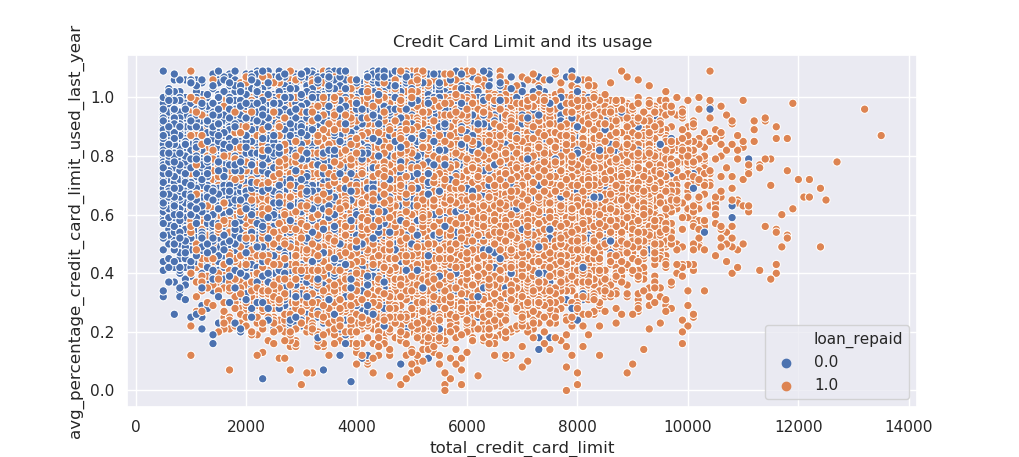

In [42]:
ax = sns.scatterplot(x="total_credit_card_limit", y="avg_percentage_credit_card_limit_used_last_year",
                     hue="loan_repaid",data=train).set_title('Credit Card Limit and its usage')

<IPython.core.display.Javascript object>


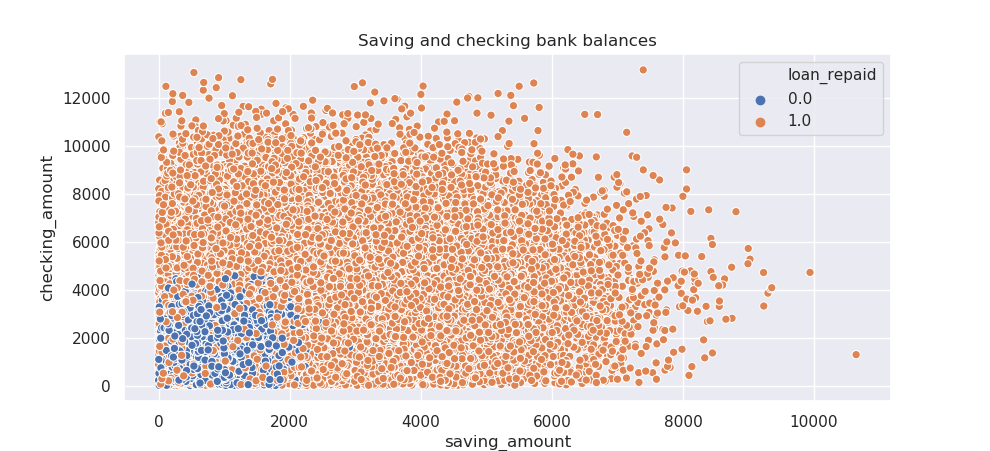

In [43]:
ax = sns.scatterplot(x="saving_amount", y="checking_amount",hue="loan_repaid",
                     data=train).set_title('Saving and checking bank balances')

<IPython.core.display.Javascript object>


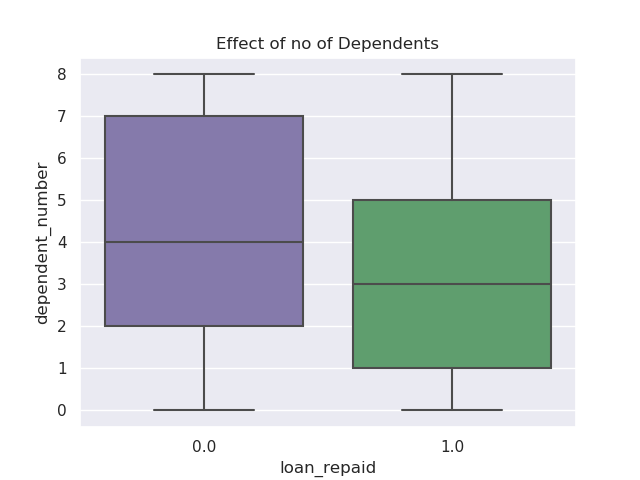

Text(0.5,1,'Effect of no of Dependents')

In [46]:
sns.boxplot(x="loan_repaid", y="dependent_number", palette=["m", "g"],data=train).set_title('Effect of no of Dependents')

<IPython.core.display.Javascript object>


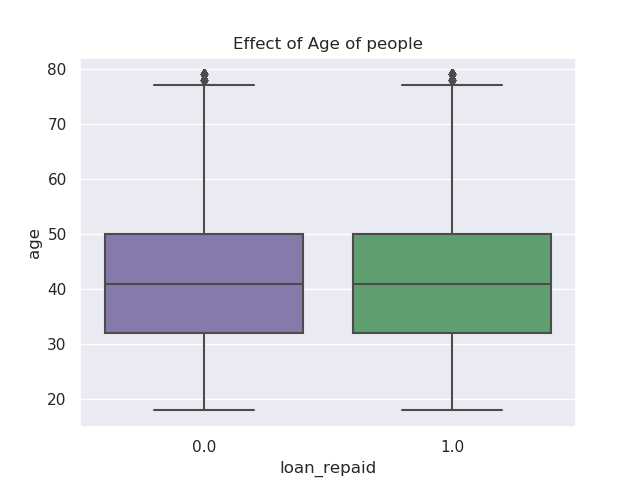

Text(0.5,1,'Effect of Age of people')

In [47]:
sns.boxplot(x="loan_repaid", y="age", palette=["m", "g"],data=train).set_title('Effect of Age of people')

<IPython.core.display.Javascript object>


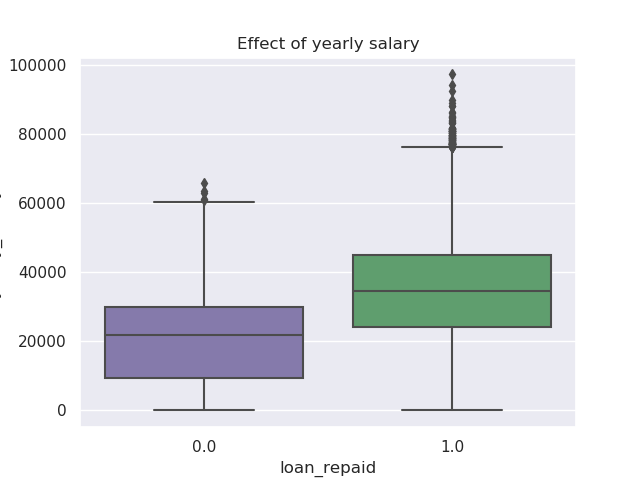

Text(0.5,1,'Effect of yearly salary')

In [48]:
sns.boxplot(x="loan_repaid", y="yearly_salary", palette=["m", "g"],data=train).set_title('Effect of yearly salary')

In [71]:
print('**Relation between loan repayment and employement**')
employement = pd.crosstab(train['is_employed'],train['loan_repaid']).reset_index()
employement.columns = ['is_employed','loan_not_repaid','loan_repaid']
employement['Percentage'] = employement.apply(lambda x: int(x['loan_repaid']*100/(x['loan_repaid']+x['loan_not_repaid'])),axis=1)
employement

**Relation between loan repayment and employement**


,is_employed,loan_not_repaid,loan_repaid,Percentage
0,0,3526,771,17
1,1,13422,29935,69


In [72]:
print('**Relation between loan repayment and purpose of loan**')
purpose = pd.crosstab(train['loan_purpose'],train['loan_repaid']).reset_index()
purpose.columns = ['loan_purpose','loan_not_repaid','loan_repaid']
purpose['Percentage'] = purpose.apply(lambda x: int(x['loan_repaid']*100/(x['loan_repaid']+x['loan_not_repaid'])),axis=1)
purpose

**Relation between loan repayment and purpose of loan**


,loan_purpose,loan_not_repaid,loan_repaid,Percentage
0,business,2990,7783,72
1,emergency_funds,3959,3794,48
2,home,3888,7726,66
3,investment,3012,7591,71
4,other,3099,3812,55


**Summary of above data exploration:**
* **Credit card limit** has significant effect on repayment of loan although the credit card usage doesnt seem to have that relationship
* There is **very strong correlation between saving and/or checking amount and loan repayment.** Its clearly visible from the scatter plot that people having more than 2000 saving amount or more than 4000 checking amount are most likely to repay the loan amount
* Less the number of dependents on a person, more the likelihood of repayment of loan
* Loan applicant's age doesnt have any effect
* More the yearly salary, more the likelihood of repayment of loan
* Employed people are paying loans consistently(69%), while unemployed people are not paying(only 17%)
* Purpose of loan is also has a significant effect on loan repayment. Loans taken for business(paid:72%), investments(paid:71%) or home(paid:66%) are most likely to be paid.

### Classification Model Training

In [98]:
print('Count of NaN values in the data set:')
loan.isna().apply(lambda x: sum(x))

Count of NaN values in the data set:


loan_id                                                0
loan_purpose                                           0
date                                                   0
loan_granted                                           0
loan_repaid                                        53446
is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
dtype: int64

I am going to replace NaN with 0 in variable **avg_percentage_credit_card_limit_used_last_year** because its coming NaN when the credit card limit is 0 so, we can replace it with 0% usage.

In [100]:
loan.loc[loan['avg_percentage_credit_card_limit_used_last_year'].isna(),'avg_percentage_credit_card_limit_used_last_year']=0

In [102]:
def switch(arg):
    switcher = {
        'emergency_funds':0,
        'other':1,
        'home':2,
        'investment':3,
        'business':3
    }
    return switcher.get(arg, 0)

In [103]:
loan['loan_purpose']=loan['loan_purpose'].apply(lambda x: switch(x))

In [105]:
loan.loc[loan['fully_repaid_previous_loans'].isna(),'fully_repaid_previous_loans']=1
loan.loc[loan['currently_repaying_other_loans'].isna(),'currently_repaying_other_loans']=-1

In [107]:
train = loan.loc[loan['loan_granted']==1,:]
newdata = loan.loc[loan['loan_granted']==0,:]

In [119]:
columns = ['loan_id','date','Duration','loan_granted','loan_repaid']
X=train.loc[:,list(set(train.columns)-set(columns))].values
X_newdata=newdata.loc[:,list(set(newdata.columns)-set(columns))].values
y=train['loan_repaid']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [124]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)
X_newdata = min_max_scaler.transform(X_newdata)

## 1. Support vector machine
The reason of choosing this model is because it is a simpler technique and has more predictive power as compared to logistics regression because it uses same techniues as logistics regression with a single change, i.e. its a large margine classifier. So, it generalize well with unknown data set. Also its faster than nueral networks which are very complex in nature and having capability to create non-linear dicision boundaries but, I think current problem can be solved using simpler and faster techniques.

In [144]:
#############################  GridSearch to get optimal parameter  ########################################
parameters = {'kernel': ['linear'], 'C':[0.1,1,10,100]}
svm_mdl = svm.SVC()
clf0 = GridSearchCV(svm_mdl,parameters,scoring='roc_auc',cv=5)
clf0.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [146]:
print('Model scores on training data')
pred0 = clf0.predict(X_train)
print('Accuracy:',mat.accuracy_score(y_train, pred0),', Precision:',mat.precision_score(y_train, pred0),
      ' Recall:',mat.recall_score(y_train, pred0))

Model scores on training data
Accuracy: 0.9029981900689872 , Precision: 0.9324777478782861  Recall: 0.9159448578748323


In [147]:
print('Model scores on test data')
pred1 = clf0.predict(X_test)
print('Accuracy:',mat.accuracy_score(y_test, pred1),', Precision:',mat.precision_score(y_test, pred1),
      ' Recall:',mat.recall_score(y_test, pred1))

Model scores on test data
Accuracy: 0.9024236701290526 , Precision: 0.9340364975724091  Recall: 0.912346688470973


Model scores on training data and test data is similar so, it can be inferred that there is no overfitting in the model and it is generalizing well for new unknown data. We are more concerned about precision of the model because precision is equivalent to % of loans will be repaid if loans are distributed according to current model prediction. For current model, 93.4% of loans will be repaid if distributed according to current model.

## 2. Random Forest
Second technique i will be using is Random Forest classifier. I think this data set follows a tree like structure. We have some people having applied for loan first time, some have taken loan and paid, some are paying previous loans. So I think it can follow a rule based structure, i.e. tree. I am using Random Forest so that it doesnt overfit. Other options could be boosting techniques which are combination of weak classifiers which often gives very good results. And then there are neural networks which are having very high capabilities to capture very complex relationships. Given more time, I could have tried boosting techniques, neural networks and ensemble model of multiple models but, for now I am restricting myself to random forest.

In [138]:
#############################  Random Forest with grid search  ########################################
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20,50],
    'max_features': [4,6,7,12],
    'n_estimators': [10,50,100]
}
#    'min_samples_split': [8,10,12],
#    'min_samples_leaf': [2,5,10],
rf = RandomForestClassifier()
clf = GridSearchCV(rf,param_grid,scoring='roc_auc',cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True], 'max_features': [4, 6, 7, 12], 'n_estimators': [10, 50, 100], 'max_depth': [10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [142]:
print('Model scores on training data')
pred2 = clf.predict(X_train)
print('Accuracy:',mat.accuracy_score(y_train, pred2),', Precision:',mat.precision_score(y_train, pred2),
      ' Recall:',mat.recall_score(y_train, pred2))

Model scores on training data
Accuracy: 0.9363376439419773 , Precision: 0.9674765882055176  Recall: 0.932658289618153


In [143]:
print('Model scores on test data')
pred3 = clf.predict(X_test)
print('Accuracy:',mat.accuracy_score(y_test, pred3),', Precision:',mat.precision_score(y_test, pred3),
      ' Recall:',mat.recall_score(y_test, pred3))

Model scores on test data
Accuracy: 0.9174273423565208 , Precision: 0.9530612244897959  Recall: 0.9164349959116925


Now, in the random forest model, th eprecision has increased to 95.3%, which is considered to be very excellent in classification scenarios. This model is also generalizing well with new unknown data. I will predict **loan_repaid** class using both models for loan cases where loan is not granted.

In [150]:
newdata['loan_repaid']=clf0.predict(X_newdata)
newdata.to_csv('SVM_Prediction.csv')

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [151]:
newdata['loan_repaid']=clf.predict(X_newdata)
newdata.to_csv('RF_Prediction.csv')

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
